# Statistical Inference with General Social Survey

<img src="images/GSS.png"/>

## Part 1: Data

### Background

The [General Social Survey (GSS)](http://gss.norc.org/) is a sociological survey used to collect information and keep a historical record of the concerns, experiences, attitudes, and practices of residents of the United States.

GSS questions cover a diverse range of issues including national spending priorities, marijuana use, crime and punishment, race relations, quality of life, confidence in institutions, and sexual behavior.

The dataset used for this project is an extract of the General Social Survey (GSS) Cumulative File 1972-2012. It consists of 57061 observations with 114 variables. Each variable corresponds to a specific question asked to the respondent.

### Methodology 

According to [Wikipedia](https://en.wikipedia.org/wiki/General_Social_Survey#Methodology), The GSS survey is conducted face-to-face with an in-person interview by NORC at the University of Chicago. The target population is adults (18+) living in households in the United States. Respondents are random sampled from a mix of urban, suburban, and rural geographic areas. Participation in the study is strictly voluntary.

### The scope of inference

The sample data should allow us to generalize to the population of interest. It is a survey of 57061 U.S adults aged 18 years or older. The survey is based on random sampling. However, there is no causation can be established as GSS is an observation study that can only establish correlation/association between variables. In addition, potential biases are associated with non-response because this is a voluntary in-person survey that takes approximately 90 minutes. Some potential respondents may choose not to participate.

In [1]:
#install.packages("package")
library(statsr)
library(dplyr)
library(ggplot2)
library(tidyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### Load Data

In [2]:
load("data/gss.Rdata")
head(gss)

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,⋯,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,⋯,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1972,23,Female,White,NA,NA,16,10,NA,⋯,Everyday,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,1972,70,Male,White,NA,NA,10,8,8,⋯,Everyday,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,1972,48,Female,White,NA,NA,12,8,8,⋯,Everyday,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,1972,27,Female,White,NA,NA,17,16,12,⋯,Once A Week,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,5,1972,61,Female,White,NA,NA,12,8,8,⋯,Everyday,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,6,1972,26,Male,White,NA,NA,14,18,19,⋯,Everyday,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Part 2: Research questions

**Research Question 1:** Do Americans distrust the media? That is, correlation between reading news and confidence in press. 

According to [Financial Times](https://www.ft.com/content/fa332f58-d9bf-11e6-944b-e7eb37a6aa8e), Public trust in traditional media has fallen to an all-time low as people increasingly favour their friends and contacts on the internet as sources of news.

This has prompted me to learn how frequency of reading news may impact a person's confidence in press. Based on above question, the analysis will be based on the following variables:

* news - How often does respondent read newspaper.
* conpress - Confidence in press.

To reflect the most recent trends, I will only keep the data from year 2010 and removing all "NA"s.

In [3]:
gss_con <- gss[ which(gss$year >= 2010 & !is.na(gss$news) & !is.na(gss$conpress)), ]

gss_con <- gss_con %>% select(news, conpress)

dim(gss_con)

[1] 1398    2

### Exploratory data analysis for Research Question 1

The data I will be using for this analysis has 1398 observations. Here is the summary and two-way table.

In [4]:
summary(gss_con)

                news             conpress  
 Everyday         :452   A Great Deal:129  
 Few Times A Week :241   Only Some   :612  
 Once A Week      :192   Hardly Any  :657  
 Less Than Once Wk:224                     
 Never            :289                     

In [5]:
table(gss_con$news, gss_con$conpress)

                   
                    A Great Deal Only Some Hardly Any
  Everyday                    50       206        196
  Few Times A Week            18       111        112
  Once A Week                 19        85         88
  Less Than Once Wk           18        97        109
  Never                       24       113        152

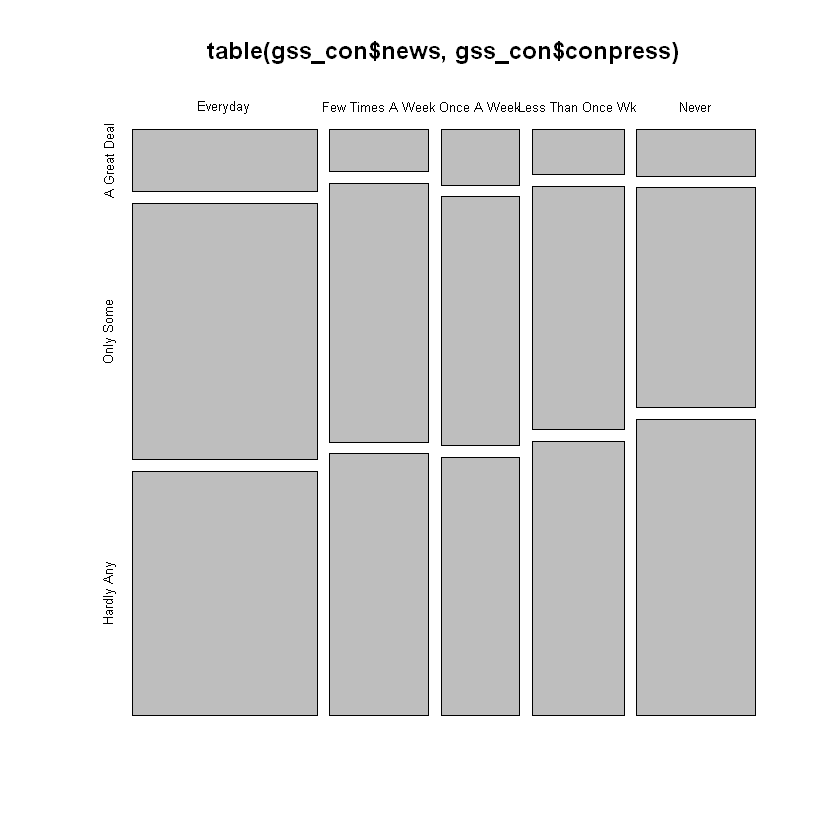

In [6]:
plot(table(gss_con$news, gss_con$conpress))

Mosaic plots provide a way to visualize contingency tables. If we compare the mosaic plot to the table of counts, the size of the boxes are related to the counts in the table. We can see that the number of respondents who read every day and only have some confidence in press are the highest, and the number of respondents who read few times a week and have great confidence in press are the lowest.

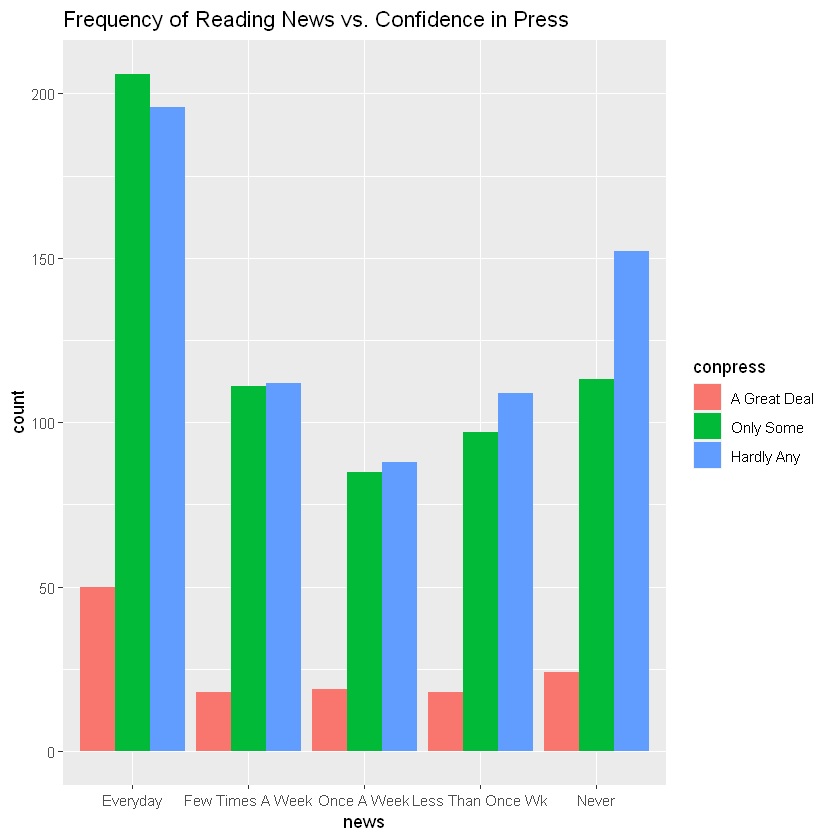

In [7]:
ggplot(aes(x=news), data=gss_con) + 
    geom_bar(aes(fill=conpress), position = position_dodge()) + 
    ggtitle('Frequency of Reading News vs. Confidence in Press')

**Observations:**

* The number of respondents who have a great deal of confidence in press are consistently lowest across all groups of news readers. 

* The number of respondents who hardly have any confidence in press are highest in three group of news readers - "Never", "Less than Once Wk" and "Once A Week".

### Inference for Research Question 1

#### State hypothesis

**Null Hypothesis:** Frequency of reading news and confidence in press are independent. Frequency of reading news does not vary by confidence in press.  
**Alternative Hypothesis:** Frequency of reading news and confidence in press are dependent. Frequency of reading news does vary by confidence in press.

#### Check conditions

* The survey respondents were random sampled, we can assume the independence. 
* If sampling without replacement, n < 10% of population. The 1398 observations met this requirement.
* Each case only contribute to one cell in the table. Because the independence requirement has been met, we can check this as well.
* Each cell must have at least 5 expected cases. From below table, it is clear that it meets the requirement.

In [8]:
gss_con_table <- table(gss_con$news, gss_con$conpress)

Xsq <- chisq.test(gss_con_table)

Xsq$expected

,A Great Deal,Only Some,Hardly Any
Everyday,41.70815,197.87124,212.42060
Few Times A Week,22.23820,105.50215,113.25966
Once A Week,17.71674,84.05150,90.23176
Less Than Once Wk,20.66953,98.06009,105.27039
Never,26.66738,126.51502,135.81760


#### State method to be used and why and how

The method used here is Chi-Square Independence Test since we are quantifying how different the observed counts are from the expected counts and we are evaluating relationship between two categorical variables. 

#### Perform inference

In [9]:
(Xsq <- chisq.test(gss_con_table))


	Pearson's Chi-squared test

data:  gss_con_table
X-squared = 8.6459, df = 8, p-value = 0.373


The Chi-Squre statistic is 8.6459, degree of freedom is 8 and the associated P value is larger than the significance level of 0.05.

#### Interpret results

We failed to reject null hypothesis, the data does not provide convincing evidence that the frequency of reading news and confidence in press are associated. 

## Research Question 2: Does marital status have impact on financial satisfaction?

According to a [report](https://www.ncbi.nlm.nih.gov/pubmed/21675570) from [The National Center for Biotechnology Information (NCBI)](https://www.ncbi.nlm.nih.gov/), people who are financially satisfied tend to be more stable in their marriages. I am interested to find out whether satisfaction in financial situation is associated with marital status, by analyzing GSS data. I will be using the following variables for this analysis:

* marital - Marital status
* satfin - Satifaction with financial situation

We will remove "NA"s and keep all years data.

### Exploratory data analysis for Research Question 2

In [10]:
gss_ma <- gss[ which(!is.na(gss$marital) & !is.na(gss$satfin)), ]

gss_ma <- gss_ma %>% select(marital, satfin)

dim(gss_ma)

[1] 52441     2

The data I will be using for this analysis have 52441 observations. Here is the summary and two-way table.

In [11]:
summary(gss_ma)

          marital                 satfin     
 Married      :28417   Satisfied     :15341  
 Widowed      : 5171   More Or Less  :23172  
 Divorced     : 6362   Not At All Sat:13928  
 Separated    : 1833                         
 Never Married:10658                         

In [12]:
table(gss_ma$marital, gss_ma$satfin)

               
                Satisfied More Or Less Not At All Sat
  Married            9281        13002           6134
  Widowed            1925         2150           1096
  Divorced           1256         2660           2446
  Separated           253          736            844
  Never Married      2626         4624           3408

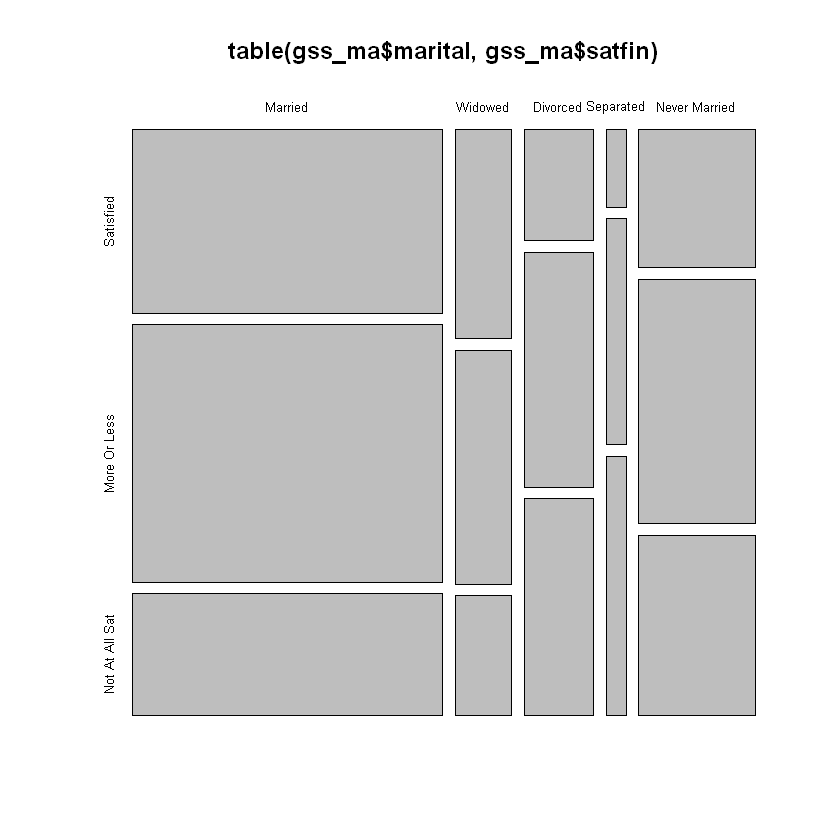

In [13]:
plot(table(gss_ma$marital, gss_ma$satfin))

Interesting to see that the number of respondents who are "married" and "satisfied" are not the highest across all the groups. Seems people are hard to please.

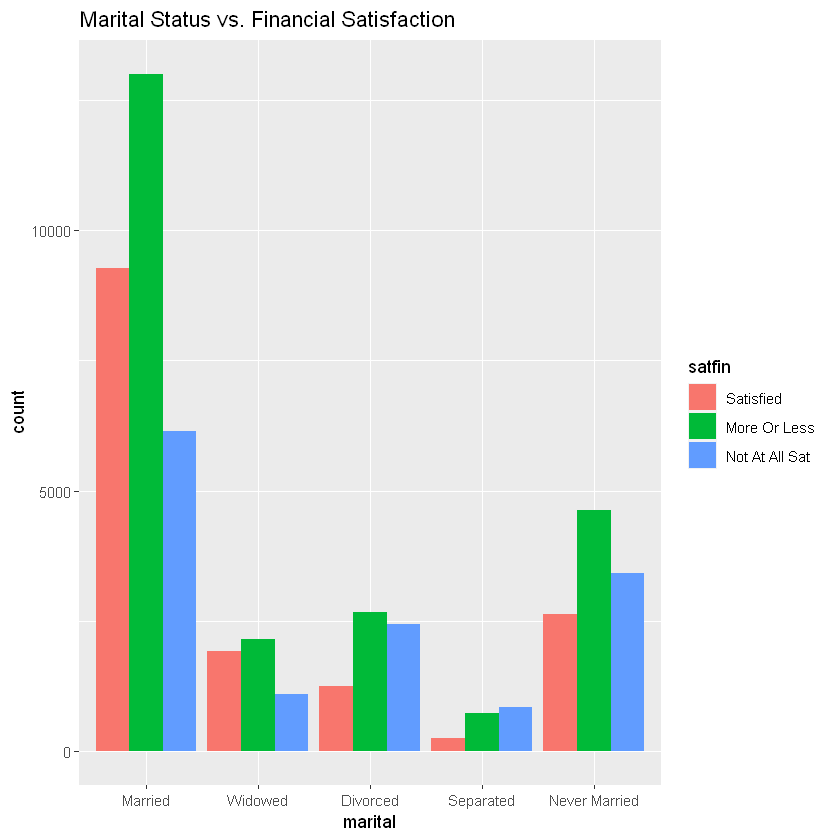

In [14]:
ggplot(aes(x=marital), data=gss_ma) + 
    geom_bar(aes(fill=satfin), position = position_dodge()) + 
    ggtitle('Marital Status vs. Financial Satisfaction')

**Observations:**

* The number of respondents who are more or less satisfied with financial situation are the highest across all groups of marital status except "Separated" group. 

* The number of respondents who are not at all satisfied with financial situation are lowest in "Married", "Widowed" and "Divorced" groups.

* The number of respondents who are satisfied with financial situation are lowest in "Never Married", "Separated" and "Divorced" groups. 

### Inference for Research Question 2

#### State hypothesis

**Null Hypothesis:** Marital status and satisfaction with financial situation are independent. Satisfaction with financial situation does not vary by marital status.  
**Alternative Hypothesis:** Marital status and satisfaction with financial situation are dependent. Satisfaction with financial situation does vary by marital status.

#### Check conditions

* The independence and sampling population (n < 10%) have been discussed earlier.  
* Each cell must have at least 5 expected cases. From below table, it is clear that it meets the requirement

In [15]:
gss_ma_table <- table(gss_ma$marital, gss_ma$satfin)

Xsq1 <- chisq.test(gss_ma_table)

Xsq1$expected

,Satisfied,More Or Less,Not At All Sat
Married,8313.0603,12556.5631,7547.3766
Widowed,1512.7155,2284.8994,1373.3851
Divorced,1861.1285,2811.1642,1689.7072
Separated,536.2227,809.9441,486.8333
Never Married,3117.8730,4709.4292,2830.6978


#### State method to be used and why and how

Again, the method used here is Chi-Square Independence Test since we are quantifying how different the observed counts are from the expected counts and we are evaluating relationship between two categorical variables. 

#### Perform inference

In [16]:
(Xsq1 <- chisq.test(gss_ma_table))


	Pearson's Chi-squared test

data:  gss_ma_table
X-squared = 1728.2, df = 8, p-value < 2.2e-16


The Chi-Squre statistic is 1728.2, degree of freedom is 8 and the associated P value is almost 0.

#### Interpret results

With such a small P value, We reject null hypothesis in favor of alternative hypothesis and conclude that satisfaction with financial situation and marital status are dependent. The study is observational, so we can only establish association but not causation between these two variables. 

## Research Question 3: Income disparity among races

The existence of racial wage gap in America has been documented by many scholars and written about in many journals. [Some research finds that the racial wage gap is focused in the private sector](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4500634/). How about U.S citizen in general? I am interested in drawing statistical inference using GSS data to compare family income between difference races. I will be using the following variables for this analysis:

* race: Race of respondent
* coninc: Total family income in constant dollars 

Again, remove all "NA"s and keep data for all the years. 

### Exploratory data analysis for Research Question 3

In [17]:
gss_in <- gss[ which(!is.na(gss$race) & !is.na(gss$coninc)), ]

gss_in <- gss_in %>% select(race, coninc)

dim(gss_in)

[1] 51232     2

The data I will be using for this analysis has 51232 observations and 2 variables.

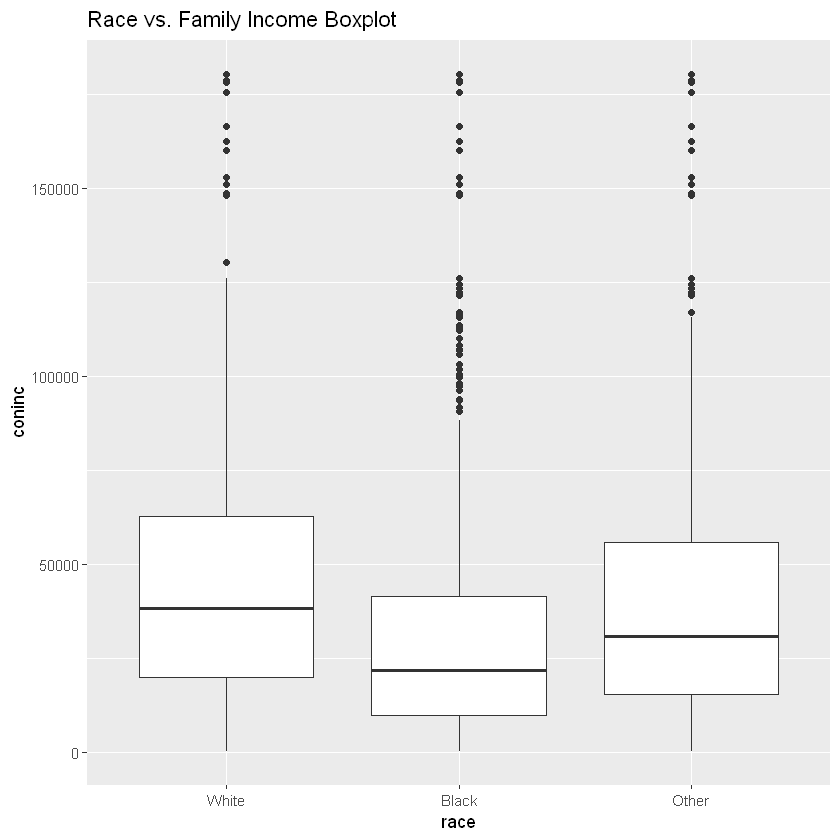

In [18]:
ggplot(aes(x=race, y=coninc), data=gss_in) + 
    geom_boxplot() + 
    ggtitle('Race vs. Family Income Boxplot')

In [19]:
by(gss_in$coninc, gss_in$race, summary)

gss_in$race: White
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    383   20129   38414   47007   62946  180386 
------------------------------------------------------------ 
gss_in$race: Black
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    383    9953   21959   30185   41523  180386 
------------------------------------------------------------ 
gss_in$race: Other
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    383   15572   30861   42415   56059  180386 

**Observations:**

* The distribution of total family incomce for all race groups are right skewed.

* The White group has the highest total family income in first quartile, median, mean and 3rd quartile.

* The Black group has the least variability in total family income.

### Inference for Research Question 3

#### State hypothesis

**Null Hypothesis:** The average total family income is the same across all race groups.  
**Alternative Hypothesis:** The average total family income differ between at least one pair of race groups.

#### Check conditions

* The survey respondents were random sampled and the samples are less than 10% of population. So the condition of independence within group is met.
* We have three race groups and they are independent of each other. 
* Distribution of response variable in each race group should be approximately normal. Unfortunatley, from below QQ plot, we can see all three groups have quite a bit divergence from normality in the upper tail.

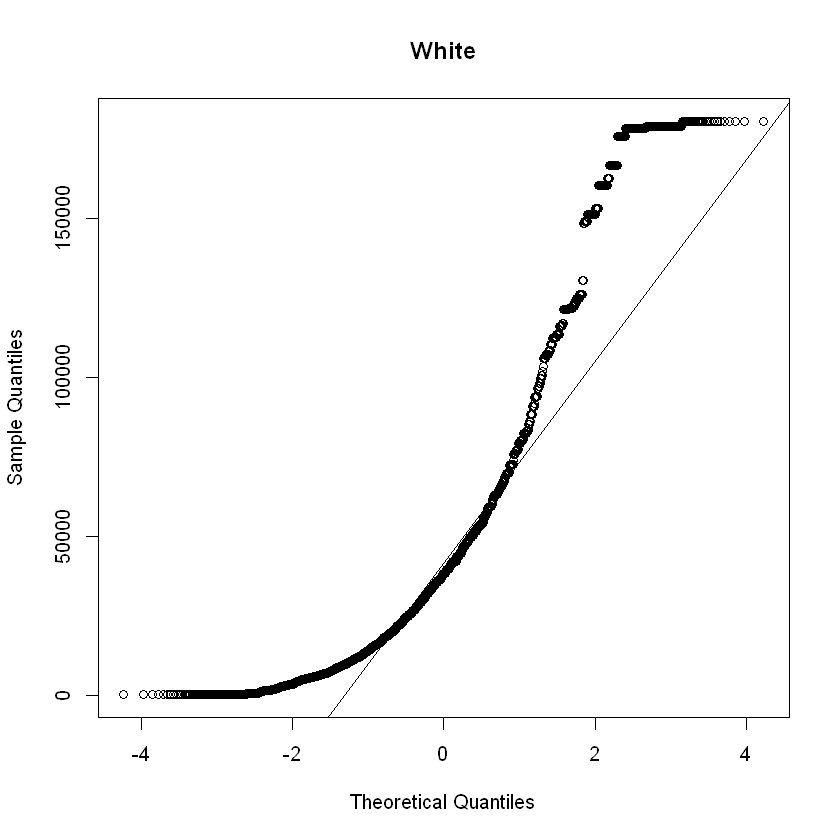

In [20]:
qqnorm(gss_in$coninc[gss_in$race=='White'], main="White")

qqline(gss_in$coninc[gss_in$race=='White'])

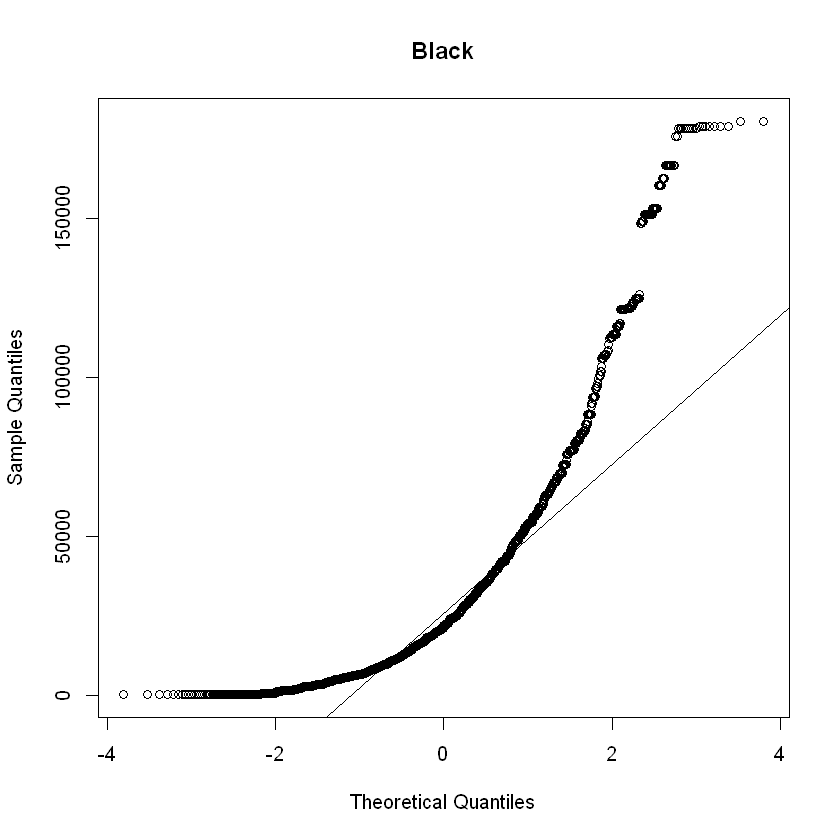

In [21]:
qqnorm(gss_in$coninc[gss_in$race=='Black'], main="Black")

qqline(gss_in$coninc[gss_in$race=='Black'])

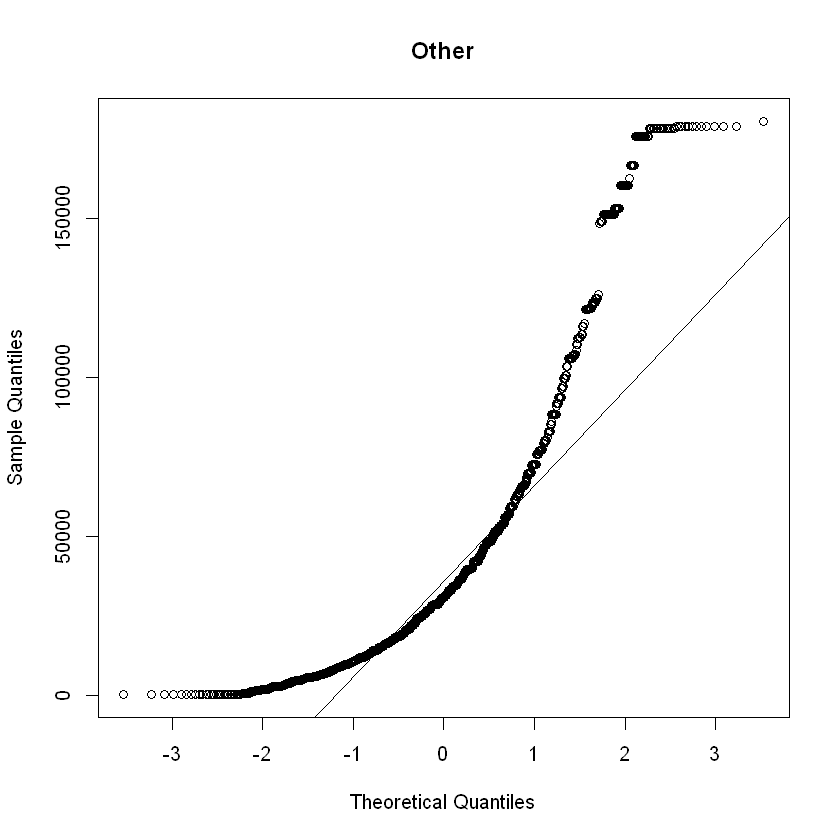

In [22]:
qqnorm(gss_in$coninc[gss_in$race=='Other'], main="Other")

qqline(gss_in$coninc[gss_in$race=='Other'])

* Variability should be consistent across groups. From above boxplot, it seems that the variability is consistent across "White" and "Other" groups, but it is much lower for the "Black" group. 

Although the assumptions of ANOVA did not meet, I will still go ahead to perform ANOVA but I have to be very careful in interpreting the results. 

#### State method to be used and why and how

We compare average family income from more than two groups, - "White", "Black" and "Other". We want to know whether those three means are so far apart that the observed differences cannot all reasonably be attributed to sampling variability. So we use ANOVA.

In [23]:
mod <- lm(coninc ~ race, data = gss_in)

anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
race,2,1.698881e+12,849440348560,675.0779,4.114154e-290
Residuals,51229,6.446068e+13,1258284917,NA,NA


#### Interpret results

* With such a small P value (almost 0), we reject the null hypothesis, we have sufficient evidence that at least one pair of race groups' population average family income are different from each other. But we don't know which pair of groups.

Since the results of ANOVA was significant, we are safe to continue with our pairwise comparisons to find out which pair of groups have difference income. 

In [24]:
pairwise.t.test(gss_in$coninc, gss_in$race, p.adj ='bonferroni')


	Pairwise comparisons using t tests with pooled SD 

data:  gss_in$coninc and gss_in$race 

      White   Black  
Black < 2e-16 -      
Other 1.4e-09 < 2e-16

P value adjustment method: bonferroni 

* Using the Bonferroni adjustment, all group pairs, White-Black, White-Other, Black-Other comparisons are statistically significant. We are using a more stringent and conservative correction (Bonferroni adjustment) and we still got very small P values, therefore, we can reject the null hypothesis again. 

#### Confidence Interval

As a last step, calculate confidence interval for one pairwise group difference - "White" and "Other".

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_White = 41824, y_bar_White = 47006.7433, s_White = 36405.4758
n_Other = 2452, y_bar_Other = 42415.4274, s_Other = 38105.4353
95% CI (White - Other): (3042.4667 , 6140.165)


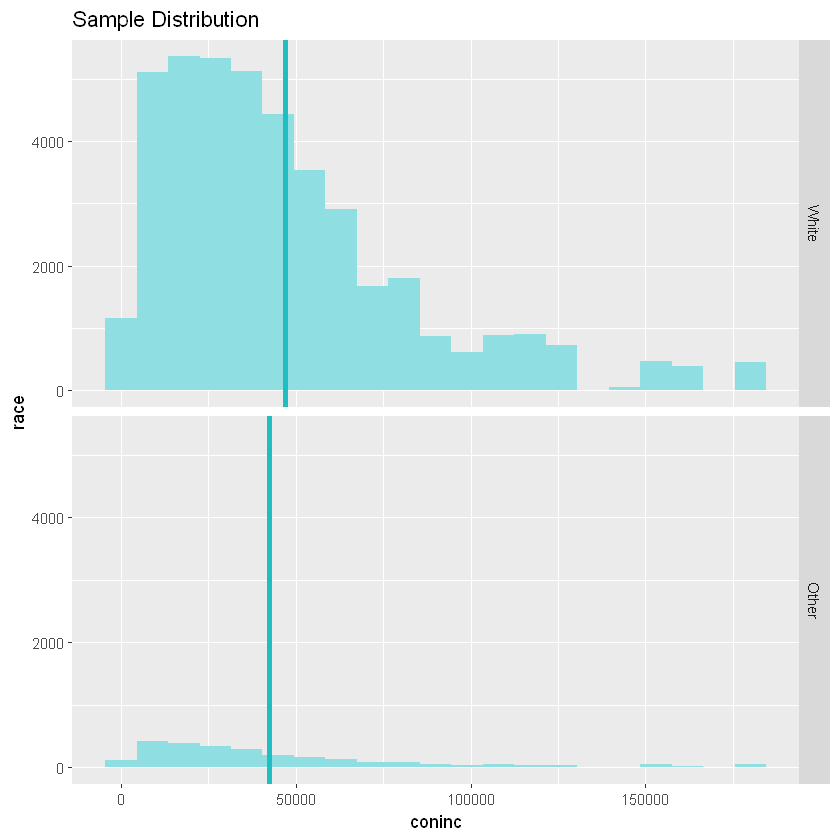

In [25]:
gss_in_w_o <- subset(gss_in, race== 'White' | race=='Other', select=c(race, coninc))

gss_in_w_o <- droplevels(gss_in_w_o)

inference(y = coninc, x = race, data = gss_in_w_o, statistic = "mean", type = "ci", conf_level = 0.95, method = "theoretical")

### Conclusion

We are 95% confident that the average total family income of the "White" group was \\$3042 to \\$6140 higher than the "Other" group per year.

Here we performed ANOVA to assess whether a significant difference exists at all amongst the groups, whereas the pairwise comparisons were used to determine which group differences are statistically significant. Although our data have significant divergence from normality for all three race groups, ANOVA is considered a robust test against the normality assumption. 


References: 

[Wikipedia](https://en.wikipedia.org/wiki/General_Social_Survey)

[GSS General Social Survey](http://gss.norc.org/)

[Pearson's Chi-squared test for count data](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/chisq.test.html)

[Stackoverflow](https://stackoverflow.com/questions/26197759/inference-function-insisting-that-i-use-anova-versus-two-sided-hypothesis-test)

[R-bloggers](https://www.r-bloggers.com/r-tutorial-series-anova-pairwise-comparison-methods/)

[Statistical inference](https://sharan-naribole.github.io/2017/04/01/inferential_stats_coursera.html)